In [1]:
%pip install seaborn
%pip install folium



   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   ---------------------------------------- 0.0/113.4 kB ? eta -:--:--
   -

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
%matplotlib inline

In [4]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Historical_Wildfires.csv"

df = pd.read_csv(URL)
print("Data read into dataframe!")

df.head()

Data read into dataframe!


,Region,Date,Estimated_fire_area,Mean_estimated_fire_brightness,Mean_estimated_fire_radiative_power,Mean_confidence,Std_confidence,Var_confidence,Count,Replaced
0,NSW,1/4/2005,8.68000,312.266667,42.400000,78.666667,2.886751,8.333333,3,R
1,NSW,1/5/2005,16.61125,322.475000,62.362500,85.500000,8.088793,65.428571,8,R
2,NSW,1/6/2005,5.52000,325.266667,38.400000,78.333333,3.214550,10.333333,3,R
3,NSW,1/7/2005,6.26400,313.870000,33.800000,92.200000,7.529940,56.700000,5,R
4,NSW,1/8/2005,5.40000,337.383333,122.533333,91.000000,7.937254,63.000000,3,R


In [9]:
print("Coloumns are below !")
print(df.columns)

Coloumns are below !
Index(['Region', 'Date', 'Estimated_fire_area',
       'Mean_estimated_fire_brightness', 'Mean_estimated_fire_radiative_power',
       'Mean_confidence', 'Std_confidence', 'Var_confidence', 'Count',
       'Replaced'],
      dtype='object')


In [11]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
dtype: object

In [12]:
import datetime as dt

df['Year'] = pd.to_datetime(df['Date']).dt.year
df['Month'] = pd.to_datetime(df['Date']).dt.month

In [13]:
df.dtypes

Region                                  object
Date                                    object
Estimated_fire_area                    float64
Mean_estimated_fire_brightness         float64
Mean_estimated_fire_radiative_power    float64
Mean_confidence                        float64
Std_confidence                         float64
Var_confidence                         float64
Count                                    int64
Replaced                                object
Year                                     int32
Month                                    int32
dtype: object

### TASK 1.1: Let's try to understand the change in average estimated fire area over time

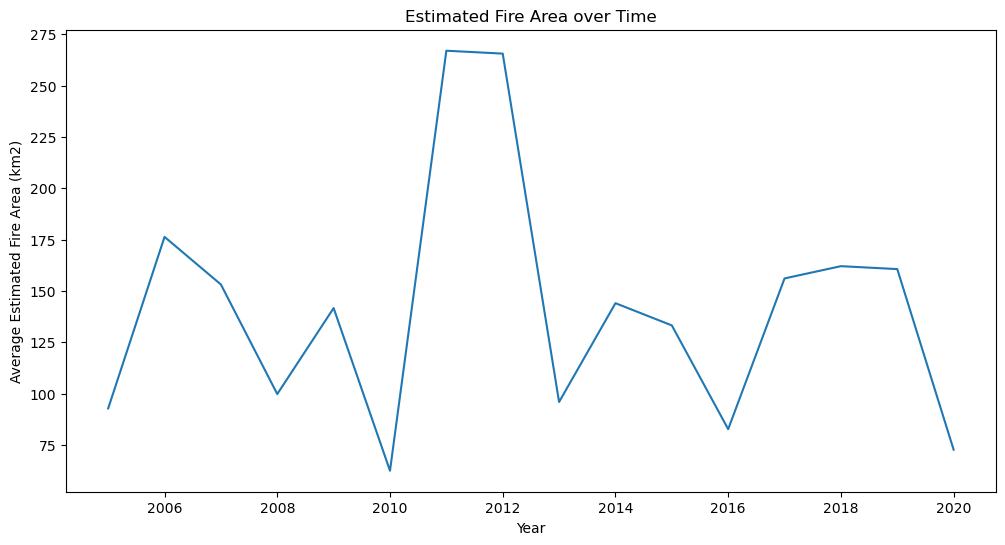

In [16]:
plt.figure(figsize=(12, 6))

df_new = df.groupby('Year')['Estimated_fire_area'].mean()
df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year')
plt.ylabel('Average Estimated Fire Area (km2)')
plt.title('Estimated Fire Area over Time')
plt.show()

### TASK 1.2: You can notice the peak in the plot between 2010 to 2013. Let's narrow down our finding, by plotting the estimated fire area for year grouped together with month.


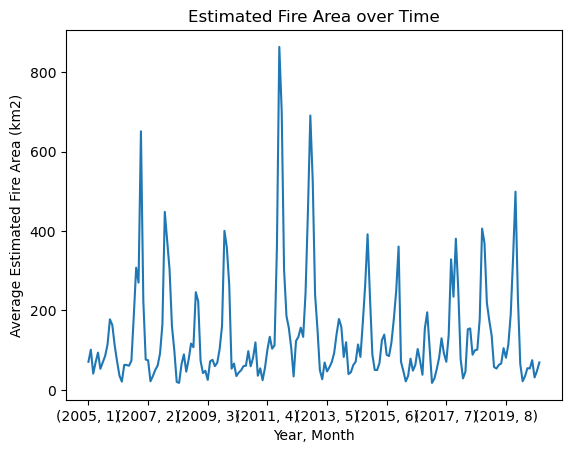

In [19]:
df_new = df.groupby(['Year', 'Month'])['Estimated_fire_area'].mean()

df_new.plot(x=df_new.index, y=df_new.values)
plt.xlabel('Year, Month')
plt.ylabel('Average Estimated Fire Area (km2)')
plt.title('Estimated Fire Area over Time')
plt.show()

### TASK 1.3: Let's have an insight on the distribution of mean estimated fire brightness across the regions<br> use the functionality of seaborn to develop a barplot


In [20]:
df['Region'].unique()

array(['NSW', 'NT', 'QL', 'SA', 'TA', 'VI', 'WA'], dtype=object)

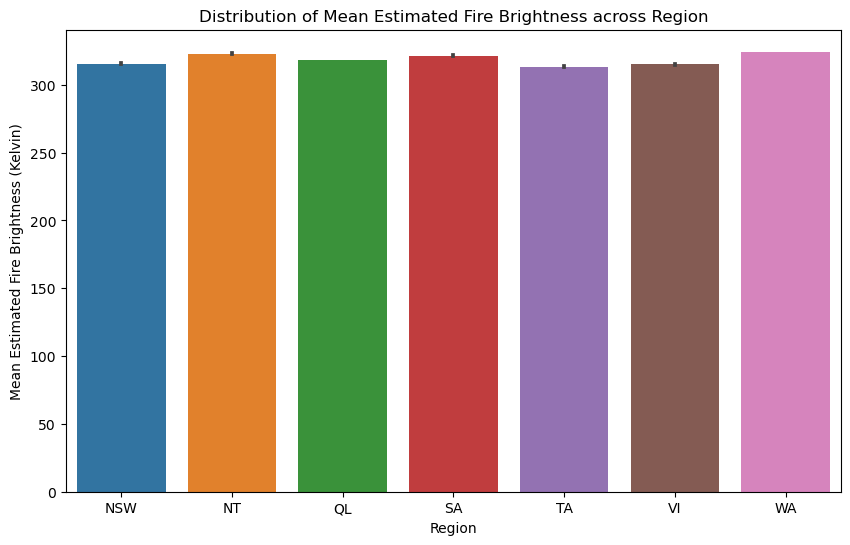

In [22]:
plt.figure(figsize=(10, 6))

sns.barplot(data=df, x='Region', y='Mean_estimated_fire_brightness')
plt.xlabel('Region')
plt.ylabel('Mean Estimated Fire Brightness (Kelvin)')
plt.title('Distribution of Mean Estimated Fire Brightness across Region')
plt.show()

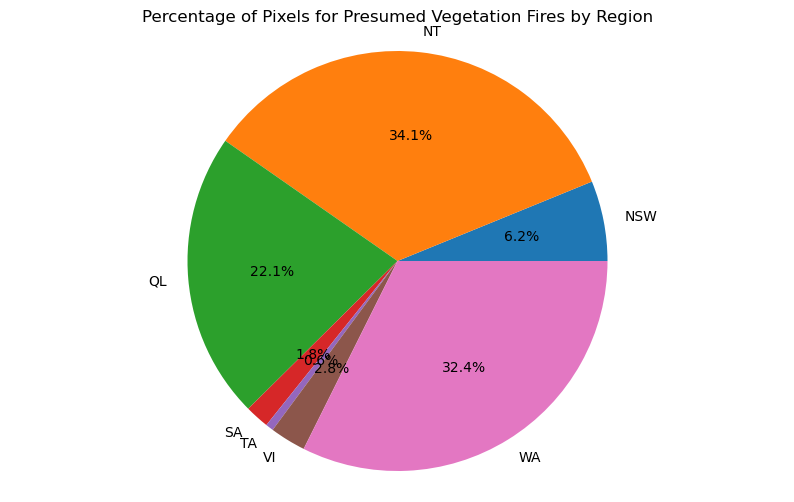

In [23]:
### Task 4
plt.figure(figsize=(10, 6))
# Grouping the data by region and summing the counts
region_counts = df.groupby('Region')['Count'].sum()
# Creating the pie chart using plt.pie function
# Labels are set to the region names, and autopct is used to display percentage
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.axis('equal')
plt.show()

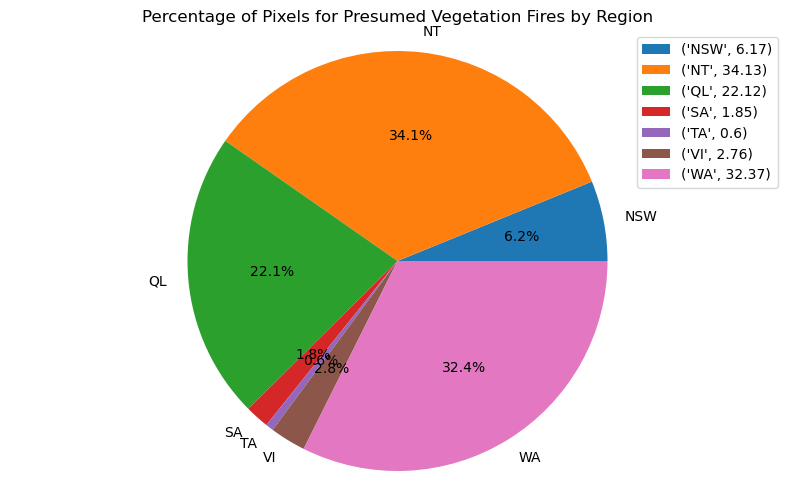

In [26]:
plt.figure(figsize=(10, 6))
# Grouping the data by region and summing the counts
region_counts = df.groupby('Region')['Count'].sum()
# Creating the pie chart using plt.pie function
# Labels are set to the region names, and autopct is used to display percentage
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%')
plt.title('Percentage of Pixels for Presumed Vegetation Fires by Region')
plt.legend([(i,round(k/region_counts.sum()*100,2)) for i,k in zip(region_counts.index, region_counts)])
plt.axis('equal')
plt.show()

### TASK 1.6: Let's try to develop a histogram of the mean estimated fire brightness<br> Using Matplotlib to create the histogram


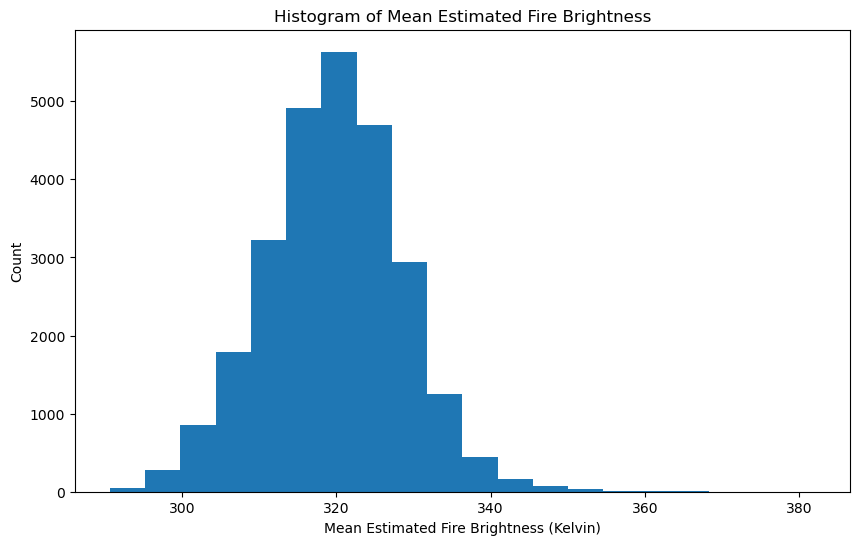

In [27]:
# Creating a histogram to visualize the distribution of mean estimated fire brightness
plt.figure(figsize=(10, 6))
# Using plt.hist to create the histogram
# Setting the number of bins to 20 for better visualization
plt.hist(x=df['Mean_estimated_fire_brightness'], bins=20)
plt.xlabel('Mean Estimated Fire Brightness (Kelvin)')
plt.ylabel('Count')
plt.title('Histogram of Mean Estimated Fire Brightness')
plt.show()

### TASK 1.7: What if we need to understand the distribution of estimated fire brightness across regions? Let's use the functionality of seaborn and  pass region as hue


D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


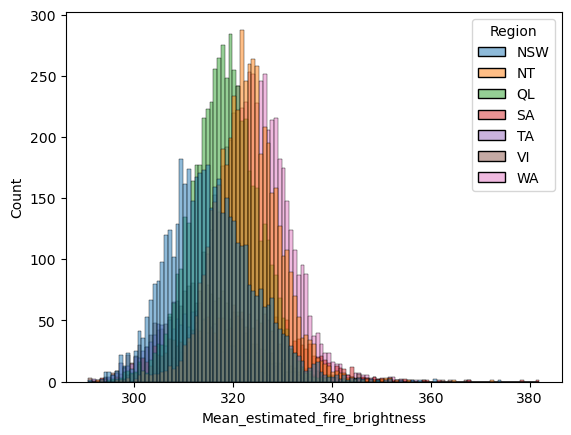

In [28]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region')
plt.show()

D:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


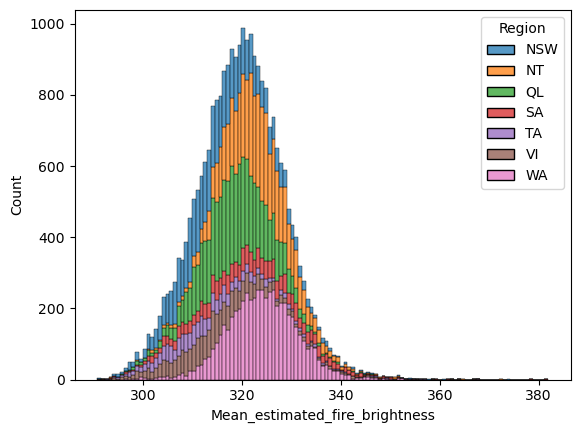

In [29]:
sns.histplot(data=df, x='Mean_estimated_fire_brightness', hue='Region', multiple='stack')
plt.show()

### TASK 1.8: Let's try to find if there is any correlation between mean estimated fire radiative power and mean confidence level?


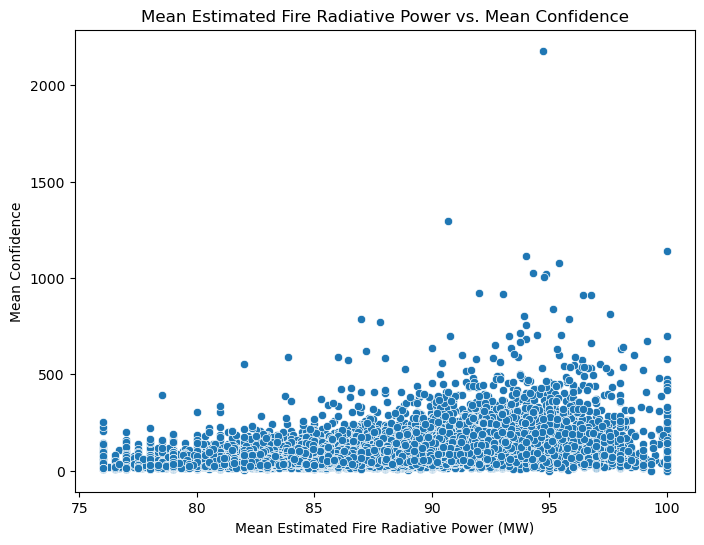

In [30]:
plt.figure(figsize=(8, 6))
    # Using sns.scatterplot to create the scatter plot
    # Specifying the DataFrame (data=df) and the columns for the x-axis (x='Mean_confidence') and y-axis            (y='Mean_estimated_fire_radiative_power')
sns.scatterplot(data=df, x='Mean_confidence', y='Mean_estimated_fire_radiative_power')
plt.xlabel('Mean Estimated Fire Radiative Power (MW)')
plt.ylabel('Mean Confidence')
plt.title('Mean Estimated Fire Radiative Power vs. Mean Confidence')
plt.show()

### TASK 1.9: Let's mark these seven regions on the Map of Australia using Folium
<br> we have created a dataframe for you containing the regions, their latitudes and longitudes. <br> For australia use [-25, 135] as location to create the map


In [31]:
region_data = {'region':['NSW','QL','SA','TA','VI','WA','NT'], 'Lat':[-31.8759835,-22.1646782,-30.5343665,-42.035067,-36.5986096,-25.2303005,-19.491411], 
               'Lon':[147.2869493,144.5844903,135.6301212,146.6366887,144.6780052,121.0187246,132.550964]}
reg=pd.DataFrame(region_data)
reg

,region,Lat,Lon
0,NSW,-31.875984,147.286949
1,QL,-22.164678,144.584490
2,SA,-30.534367,135.630121
3,TA,-42.035067,146.636689
4,VI,-36.598610,144.678005
5,WA,-25.230300,121.018725
6,NT,-19.491411,132.550964


In [33]:
# instantiate a feature group 
aus_reg = folium.map.FeatureGroup()

# Create a Folium map centered on Australia
Aus_map = folium.Map(location=[-25, 135], zoom_start=4)

# loop through the region and add to feature group
for lat, lng, lab in zip(reg.Lat, reg.Lon, reg.region):
    aus_reg.add_child(
        folium.features.CircleMarker(
            [lat, lng],
            popup=lab,
            radius=5, # define how big you want the circle markers to be
            color='red',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6
        )
    )

# add incidents to map
Aus_map.add_child(aus_reg)